In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display as dis
from scipy.io import wavfile

In [2]:
samples, sample_rate = librosa.load('/Users/praveenrajveluswami/Documents/CS412-IML/Project/Input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00000.wav', sr=None)
print(sample_rate)

22050


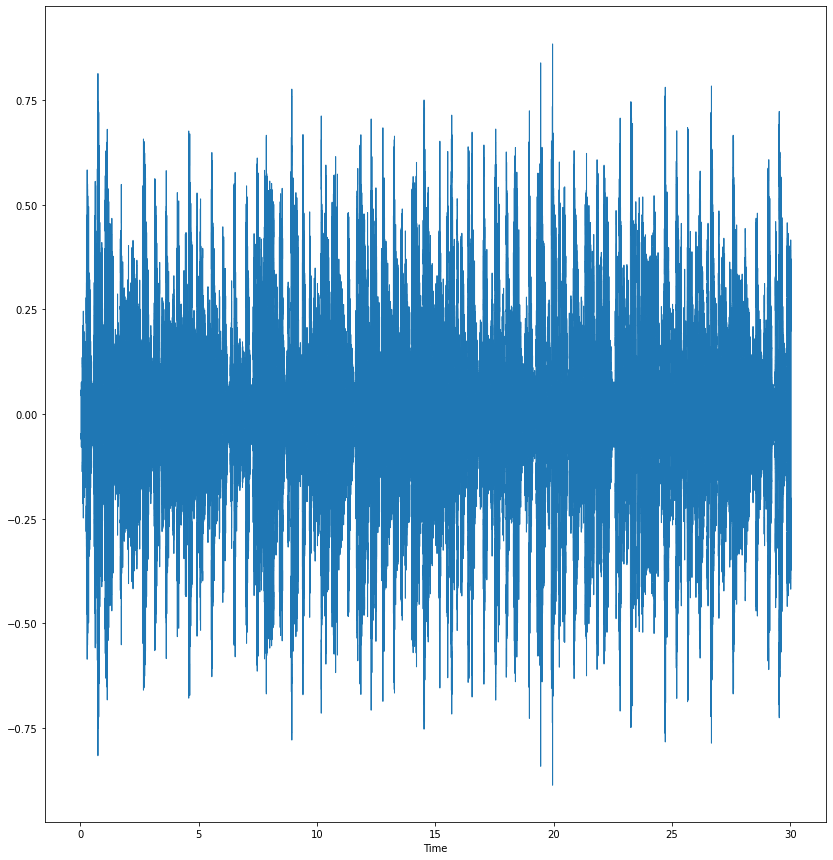

In [3]:
plt.figure(figsize=(14, 15))
dis.waveshow(y=samples, sr=sample_rate)

In [4]:
type(samples)

numpy.ndarray

/Users/praveenrajveluswami/opt/anaconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


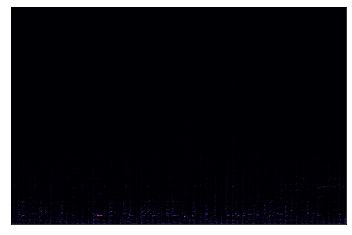

In [5]:
sgram = librosa.stft(samples)
librosa.display.specshow(sgram)

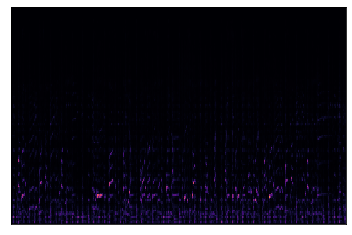

In [6]:
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)

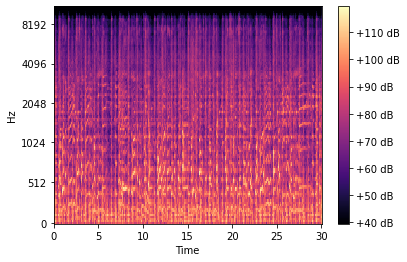

In [7]:
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

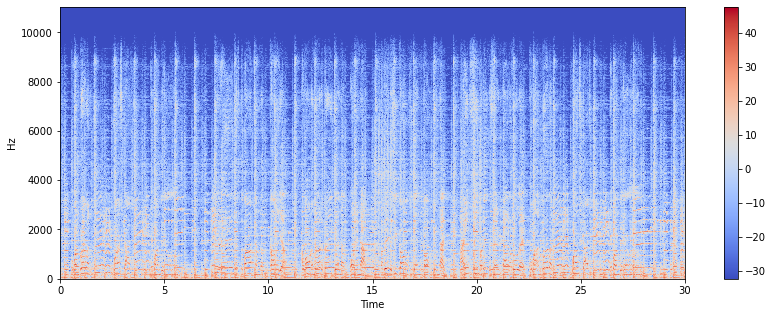

In [8]:
X = librosa.stft(samples)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

In [9]:
S = np.abs(librosa.stft(samples))
chroma = librosa.feature.chroma_stft(y=samples, sr=sample_rate)
print(chroma)

[[0.3311255  0.23492369 0.87141657 ... 0.1569107  0.877862   1.        ]
 [0.39392975 0.29400358 0.68826514 ... 0.13222213 0.6850757  0.72816885]
 [0.42932418 0.41955495 0.51602733 ... 0.25044864 0.5649643  0.40339905]
 ...
 [1.         1.         1.         ... 0.26199493 0.9551483  0.8657351 ]
 [0.4203325  0.3679797  0.6217583  ... 1.         1.         0.98580575]
 [0.30348295 0.1970005  0.64925486 ... 0.62876093 0.7172246  0.81626564]]


In [10]:
print(chroma.mean())

0.3501285


In [11]:
import pandas as pd

In [12]:
metadata = pd.read_csv('/Users/praveenrajveluswami/Documents/CS412-IML/Project/Input/gtzan-dataset-music-genre-classification/Data/features_30_sec.csv')
metadata.head(10)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,1.297741e+05,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,3.758501e+05,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,1.564676e+05,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,1.843559e+05,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,3.433999e+05,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
5,blues.00005.wav,661794,0.302456,0.087532,0.103494,0.003981,1831.993940,1.030482e+06,1729.653287,201910.508633,...,72.549225,-1.838263,68.702026,-2.783800,42.447453,-3.047909,39.808784,-8.109991,46.311005,blues
6,blues.00006.wav,661794,0.291328,0.093981,0.141874,0.008803,1459.366472,4.378594e+05,1389.009131,185023.239545,...,83.248245,-10.913176,56.902153,-6.971336,38.231800,-3.436505,48.235741,-6.483466,70.170364,blues
7,blues.00007.wav,661794,0.307955,0.092903,0.131822,0.005531,1451.667066,4.495682e+05,1577.270941,168211.938804,...,70.438438,-10.568935,52.090893,-10.784515,60.461330,-4.690678,65.547516,-8.630722,56.401436,blues
8,blues.00008.wav,661794,0.408879,0.086512,0.142416,0.001507,1719.368948,1.632828e+05,2031.740381,105542.718193,...,50.563751,-7.041824,28.894934,2.695248,36.889568,3.412305,33.698597,-2.715692,36.418430,blues
9,blues.00009.wav,661794,0.273950,0.092316,0.081314,0.004347,1817.150863,2.982361e+05,1973.773306,114070.112591,...,59.314602,-1.916804,58.418438,-2.292661,83.205231,2.881967,77.082222,-4.235203,91.468811,blues


In [13]:
metadata.nunique()

filename                   1000
length                       35
chroma_stft_mean            986
chroma_stft_var             986
rms_mean                    986
rms_var                     986
spectral_centroid_mean      986
spectral_centroid_var       986
spectral_bandwidth_mean     986
spectral_bandwidth_var      986
rolloff_mean                986
rolloff_var                 986
zero_crossing_rate_mean     984
zero_crossing_rate_var      986
harmony_mean                986
harmony_var                 986
perceptr_mean               986
perceptr_var                986
tempo                        35
mfcc1_mean                  986
mfcc1_var                   986
mfcc2_mean                  986
mfcc2_var                   986
mfcc3_mean                  986
mfcc3_var                   986
mfcc4_mean                  986
mfcc4_var                   986
mfcc5_mean                  986
mfcc5_var                   986
mfcc6_mean                  986
mfcc6_var                   986
mfcc7_me

In [14]:
# Checking for null values
metadata.isnull().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [15]:
import seaborn as sns

<AxesSubplot:xlabel='length'>

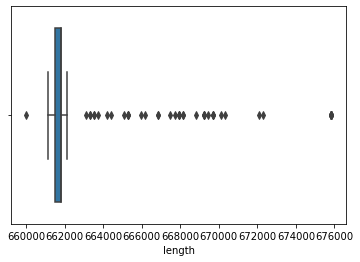

In [16]:
# Box plot for the column - length
sns.boxplot(x=metadata['length'])

In [17]:
from scipy import stats

In [19]:
# Visualizing Q1,Q3 and IQR for each column
Q1 = metadata.quantile(0.25)
Q3 = metadata.quantile(0.75)
IQR = Q3 - Q1
print('Q1 values')
print(Q1)
print('Q3 values')
print(Q3)
print('IQR values')
print(IQR)

Q1 values
length                     661504.000000
chroma_stft_mean                0.319562
chroma_stft_var                 0.082298
rms_mean                        0.086657
rms_var                         0.000942
spectral_centroid_mean       1627.697311
spectral_centroid_var      184350.530174
spectral_bandwidth_mean      1907.240605
spectral_bandwidth_var      67376.554428
rolloff_mean                 3380.069642
rolloff_var                772731.230777
zero_crossing_rate_mean         0.070244
zero_crossing_rate_var          0.001079
harmony_mean                   -0.000104
harmony_var                     0.004383
perceptr_mean                  -0.000537
perceptr_var                    0.001293
tempo                          99.384014
mfcc1_mean                   -200.763893
mfcc1_var                    1844.488129
mfcc2_mean                     76.779915
mfcc2_var                     398.020767
mfcc3_mean                    -24.219811
mfcc3_var                     270.466576
mfcc4_

In [20]:
#Detect outliers and replace them with upper whisker/lower whisker , mean or median
for col_name in metadata.select_dtypes(exclude=['object']).columns:
    Q1 = metadata[col_name].quantile(0.25)
    Q3 = metadata[col_name].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 +(whisker_width*IQR)
    #Replacing with upper whisker for upper values and lower whisker for lower values
    metadata[col_name]=np.where(metadata[col_name]>upper_whisker,upper_whisker,np.where(metadata[col_name]<lower_whisker,lower_whisker,metadata[col_name]))
#     #Replacing with mean
#     mean = meatadata[col_name].mean()
#     metadata[col_name]=np.where(metadata[col_name]>upper_whisker,mean,np.where(metadata[col_name]<lower_whisker,mean,metadata[col_name]))
#     #Replacing with median
#     median = meatadata[col_name].median()
#     metadata[col_name]=np.where(metadata[col_name]>upper_whisker,median,np.where(metadata[col_name]<lower_whisker,median,metadata[col_name]))
    
    

In [25]:
# Remove duplicate rows. Filename and label columns are excluded.
metadata = metadata.drop_duplicates(subset=metadata.drop(['filename', 'label'], axis=1).columns.tolist())

In [26]:
metadata.to_csv('preprocessed_data.csv')